# Initial Inspection 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf = gpd.read_file("../Data/BritishColumbia/gid_330911/Valemount_landslide_inventory_2022.shp")

In [3]:
print(f"Number of landslides: {len(gdf)}")

Number of landslides: 2188


In [4]:
print(f"Number of fields (columns): {len(gdf.columns)}\n")
print("Field names and dtypes:")
print(gdf.dtypes)

Number of fields (columns): 10

Field names and dtypes:
id               int64
Lnds_name       object
Lnds_zone       object
Type            object
Ortho_1x1       object
Google          object
LiDAR           object
Certainty        int64
Channelize      object
geometry      geometry
dtype: object


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          2188 non-null   int64   
 1   Lnds_name   2188 non-null   object  
 2   Lnds_zone   2188 non-null   object  
 3   Type        2188 non-null   object  
 4   Ortho_1x1   2188 non-null   object  
 5   Google      2188 non-null   object  
 6   LiDAR       2188 non-null   object  
 7   Certainty   2188 non-null   int64   
 8   Channelize  2188 non-null   object  
 9   geometry    2188 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 171.1+ KB


In [6]:
null_counts = gdf.isnull().sum()
pct_filled = (1 - null_counts / len(gdf)) * 100
df_null = pd.DataFrame({
    "null_count": null_counts,
    "% filled": pct_filled.round(1)
}).sort_values("null_count")
print("\nNull counts and % filled per field:")
print(df_null)


Null counts and % filled per field:
            null_count  % filled
id                   0     100.0
Lnds_name            0     100.0
Lnds_zone            0     100.0
Type                 0     100.0
Ortho_1x1            0     100.0
Google               0     100.0
LiDAR                0     100.0
Certainty            0     100.0
Channelize           0     100.0
geometry             0     100.0


In [7]:
gdf.head(10)

,id,Lnds_name,Lnds_zone,Type,Ortho_1x1,Google,LiDAR,Certainty,Channelize,geometry
0,2195,val.1324,source,potential source area,yes,yes,yes,1,no,"POLYGON ((362389.349 5872025.621, 362426.269 5..."
1,308,val.0067,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((330992.251 5880141.682, 330981.668 5..."
2,310,val.0089,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((331953.35 5879777.549, 331945.413 58..."
3,1429,val.0087,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((331513.921 5878548.022, 331512.819 5..."
4,314,val.0088,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((334255.608 5878316.877, 334237.087 5..."
5,435,val.0240,source,potential source area,yes,yes,no,1,yes,"POLYGON ((352927.62 5873816.965, 352922.282 58..."
6,971,val.0585,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((330900.181 5881487.563, 330820.806 5..."
7,1155,val.0703,source,potential source area,yes,yes,yes,1,yes,"POLYGON ((316369.323 5892849.937, 316367.941 5..."
8,1428,val.0838,source,potential source area,yes,yes,yes,1,no,"POLYGON ((359956.655 5878036.83, 359943.904 58..."
9,1472,val.0866,source,potential source area,yes,yes,no,3,no,"POLYGON ((361253.635 5878102.379, 361164.864 5..."


In [7]:
gdf.tail(10)

,id,Lnds_name,Lnds_zone,Type,Ortho_1x1,Google,LiDAR,Certainty,Channelize,geometry
2178,418,val.0241,transportation,debris flow,yes,yes,yes,1,no,"POLYGON ((350403.743 5875813.259, 350410.461 5..."
2179,2345,val.1421,deposition,debris flow,yes,yes,yes,1,no,"POLYGON ((359897.046 5879393.05, 359900.964 58..."
2180,2346,val.1421,source,debris flow,yes,yes,yes,1,no,"POLYGON ((359856.182 5879367.3, 359848.905 587..."
2181,2347,val.0893,source,debris flow,no,no,no,1,no,"POLYGON ((365881.692 5873725.406, 365885.767 5..."
2182,1591,val.0932,deposition,debris flow,no,no,yes,1,no,"POLYGON ((370375.806 5871279.798, 370375.226 5..."
2183,2348,val.1422,deposition,debris flow,yes,yes,yes,1,no,"POLYGON ((372071.301 5867237.726, 372091.853 5..."
2184,2349,val.1423,deposition,debris flow,yes,yes,no,1,no,"POLYGON ((370576.642 5868297.748, 370577.688 5..."
2185,2101,val.1264,deposition,colluvium,yes,yes,yes,1,no,"POLYGON ((364221.301 5867608.404, 364220.978 5..."
2186,2350,val.1424,source,rotational slide,no,yes,yes,1,no,"POLYGON ((320117.484 5890958.043, 320077.6 589..."
2187,2351,val.1424,deposition,rotational slide,no,yes,yes,1,no,"POLYGON ((319689.393 5890375.732, 319684.075 5..."


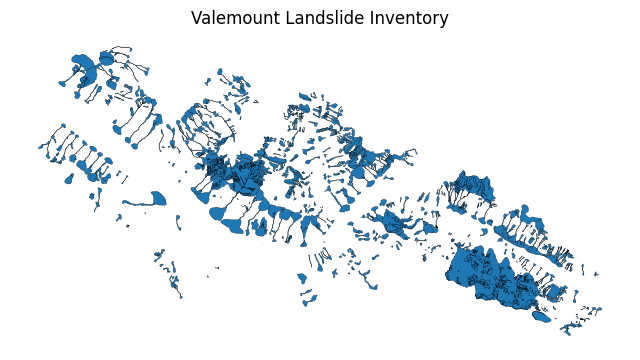

In [8]:
gdf.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("Valemount Landslide Inventory")
plt.axis("off")
plt.show()

# Numerical Analysis

In [10]:
# Seperating deposits by column types
numerical_cols = gdf.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = gdf.select_dtypes(exclude=['number']).columns.tolist()

In [11]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:
  - id
  - Certainty

Non-Numerical Columns:
  - Lnds_name
  - Lnds_zone
  - Type
  - Ortho_1x1
  - Google
  - LiDAR
  - Channelize
  - geometry


Statistical summary of id and Certainity is not useful. Just putting it here in case we add some new numerical data and need a way to quickly calculate it's summary.

In [16]:
print("\nStatistical summary for Numerical data:")
numerical_stats = gdf[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
           min     max         mean         std
id         2.0  2352.0  1174.303931  682.266796
Certainty  1.0     3.0     1.170018    0.472738


In [17]:
print("\nStatistical summary for Certainity data:")
numerical_stats = gdf["Certainty"].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Certainity data:
min     1.000000
max     3.000000
mean    1.170018
std     0.472738
Name: Certainty, dtype: float64


In [18]:
# Spatial extent
minx, miny, maxx, maxy = gdf.total_bounds
print(f"\nSpatial bounds:\n  minx: {minx}, miny: {miny}\n  maxx: {maxx}, maxy: {maxy}")



Spatial bounds:
  minx: 311552.95766948105, miny: 5861694.18617443
  maxx: 376460.9910909966, maxy: 5894969.5010674605


# Non Numerical Analysis

In [19]:
for col in non_numerical_cols:
    if col in gdf.columns:
        print(f"\nValue counts for {col}:")
        print(gdf[col].value_counts(dropna=False))


Value counts for Lnds_name:
Lnds_name
val.0127    15
val.0235    11
val.0692     9
val.0834     9
val.0691     8
            ..
val.0306     1
val.0827     1
val.0304     1
val.0303     1
val.1324     1
Name: count, Length: 1285, dtype: int64

Value counts for Lnds_zone:
Lnds_zone
deposition        967
source            942
transportation    279
Name: count, dtype: int64

Value counts for Type:
Type
debris flow              1205
debris slide              240
colluvium                 185
rockfall                  174
talus                     154
rock slide                101
translational slide        69
rotational slide           27
potential source area      18
rock avalanche             11
coalescent debris           3
earth flow                  1
Name: count, dtype: int64

Value counts for Ortho_1x1:
Ortho_1x1
yes    1732
no      455
Yes       1
Name: count, dtype: int64

Value counts for Google:
Google
yes    1773
no      411
ye        3
Yes       1
Name: count, dtype: int64

V

In [20]:
print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")


Non-Numerical Columns:
  - Lnds_name
  - Lnds_zone
  - Type
  - Ortho_1x1
  - Google
  - LiDAR
  - Channelize
  - geometry


### Lnds Zone

In [21]:
print("\nValue counts for 'Lnds_zone':")
print(gdf['Lnds_zone'].value_counts())


Value counts for 'Lnds_zone':
Lnds_zone
deposition        967
source            942
transportation    279
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/3506381789.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lnds_zone_counts.index, y=lnds_zone_counts.values, palette='coolwarm')


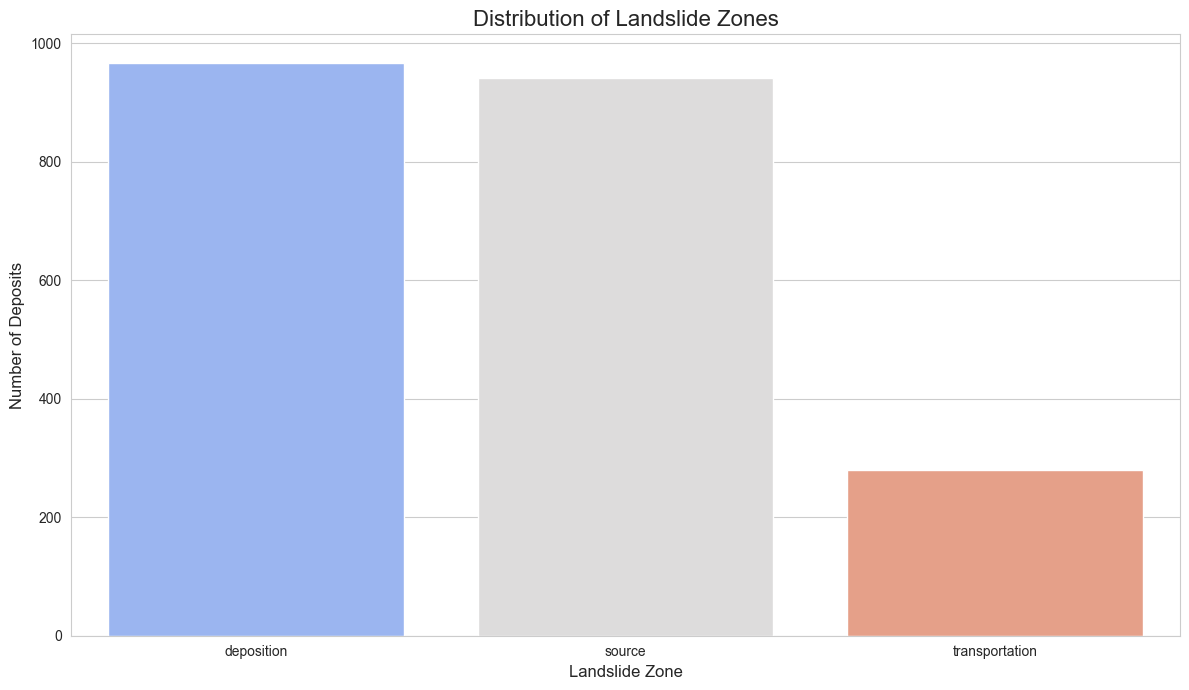

In [22]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

# Get the value counts
lnds_zone_counts = gdf['Lnds_zone'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=lnds_zone_counts.index, y=lnds_zone_counts.values, palette='coolwarm')

plt.title('Distribution of Landslide Zones', fontsize=16)
plt.xlabel('Landslide Zone', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Type

In [23]:
print("\nValue counts for 'Type':")
print(gdf['Type'].value_counts())


Value counts for 'Type':
Type
debris flow              1205
debris slide              240
colluvium                 185
rockfall                  174
talus                     154
rock slide                101
translational slide        69
rotational slide           27
potential source area      18
rock avalanche             11
coalescent debris           3
earth flow                  1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/1810379006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')


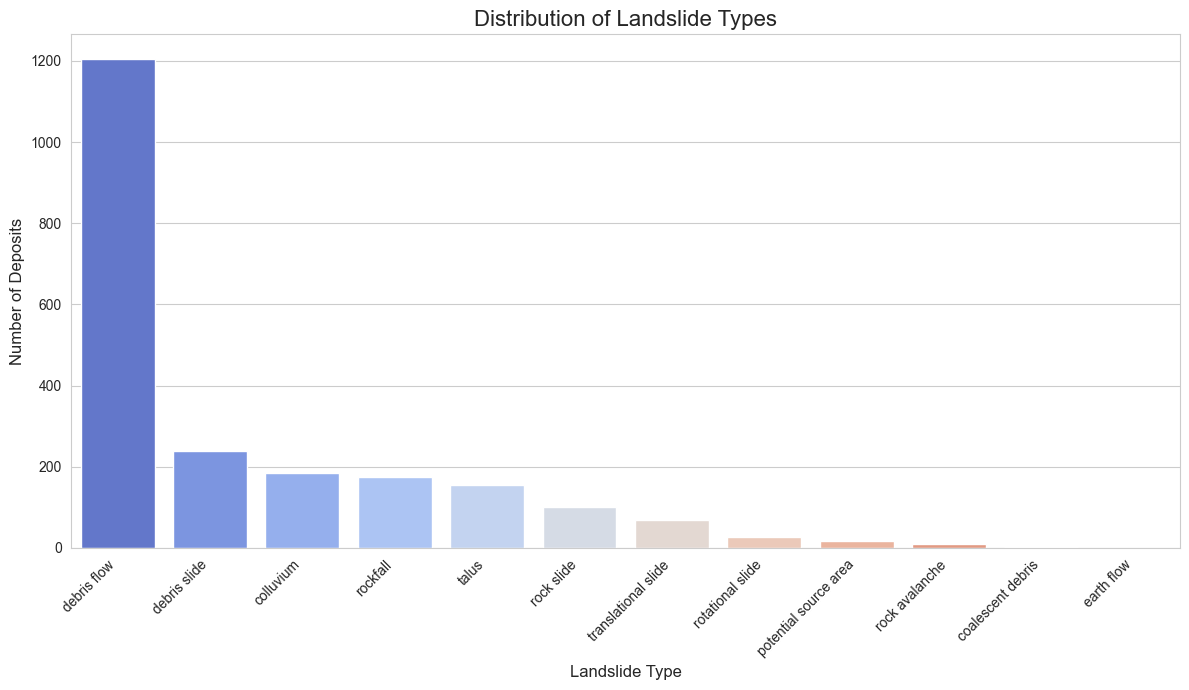

In [24]:
plt.figure(figsize=(12, 7)) 

# Get the value counts
type_counts = gdf['Type'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')

plt.title('Distribution of Landslide Types', fontsize=16)
plt.xlabel('Landslide Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Ortho 1x1

In [25]:
print("\nValue counts for 'Ortho_1x1':")
print(gdf['Ortho_1x1'].value_counts())


Value counts for 'Ortho_1x1':
Ortho_1x1
yes    1732
no      455
Yes       1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/3815453.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ortho_counts.index, y=ortho_counts.values, palette='coolwarm')


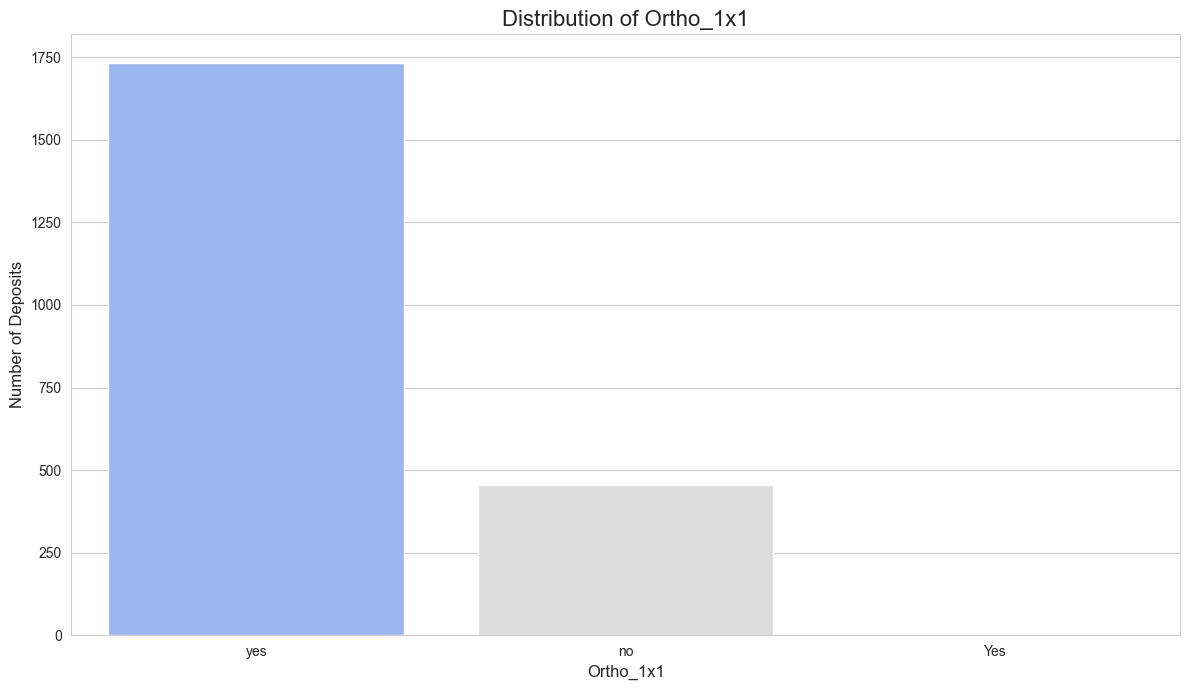

In [26]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

# Get the value counts
ortho_counts = gdf['Ortho_1x1'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=ortho_counts.index, y=ortho_counts.values, palette='coolwarm')

plt.title('Distribution of Ortho_1x1', fontsize=16)
plt.xlabel('Ortho_1x1', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Google

In [27]:
print("\nValue counts for 'Google':")
print(gdf['Google'].value_counts())


Value counts for 'Google':
Google
yes    1773
no      411
ye        3
Yes       1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/2368109328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=google_counts.index, y=google_counts.values, palette='coolwarm')


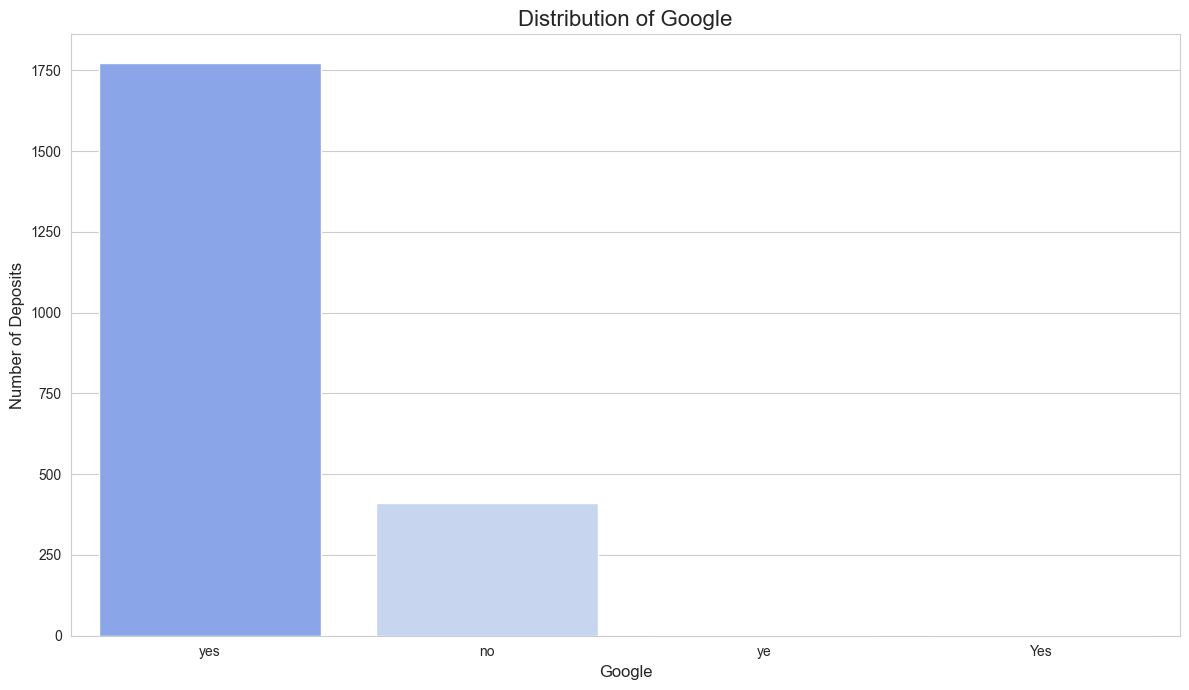

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

# Get the value counts
google_counts = gdf['Google'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=google_counts.index, y=google_counts.values, palette='coolwarm')

plt.title('Distribution of Google', fontsize=16)
plt.xlabel('Google', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### LiDAR

In [29]:
print("\nValue counts for 'LiDAR':")
print(gdf['LiDAR'].value_counts())


Value counts for 'LiDAR':
LiDAR
yes    1764
no      422
tes       1
Yes       1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/2174074326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lidar_counts.index, y=lidar_counts.values, palette='coolwarm')


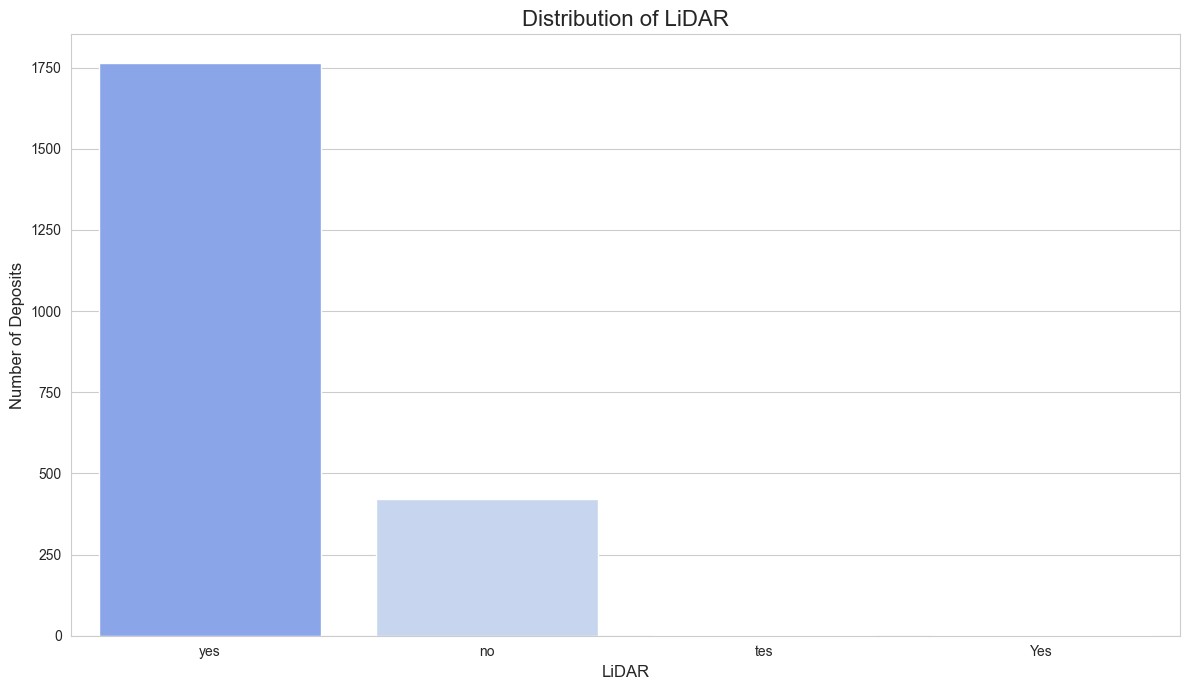

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

# Get the value counts
lidar_counts = gdf['LiDAR'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=lidar_counts.index, y=lidar_counts.values, palette='coolwarm')

plt.title('Distribution of LiDAR', fontsize=16)
plt.xlabel('LiDAR', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Channelize

In [31]:
print("\nValue counts for 'Channelize':")
print(gdf['Channelize'].value_counts())


Value counts for 'Channelize':
Channelize
no     1960
yes     228
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/1017468698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channelize_counts.index, y=channelize_counts.values, palette='coolwarm')


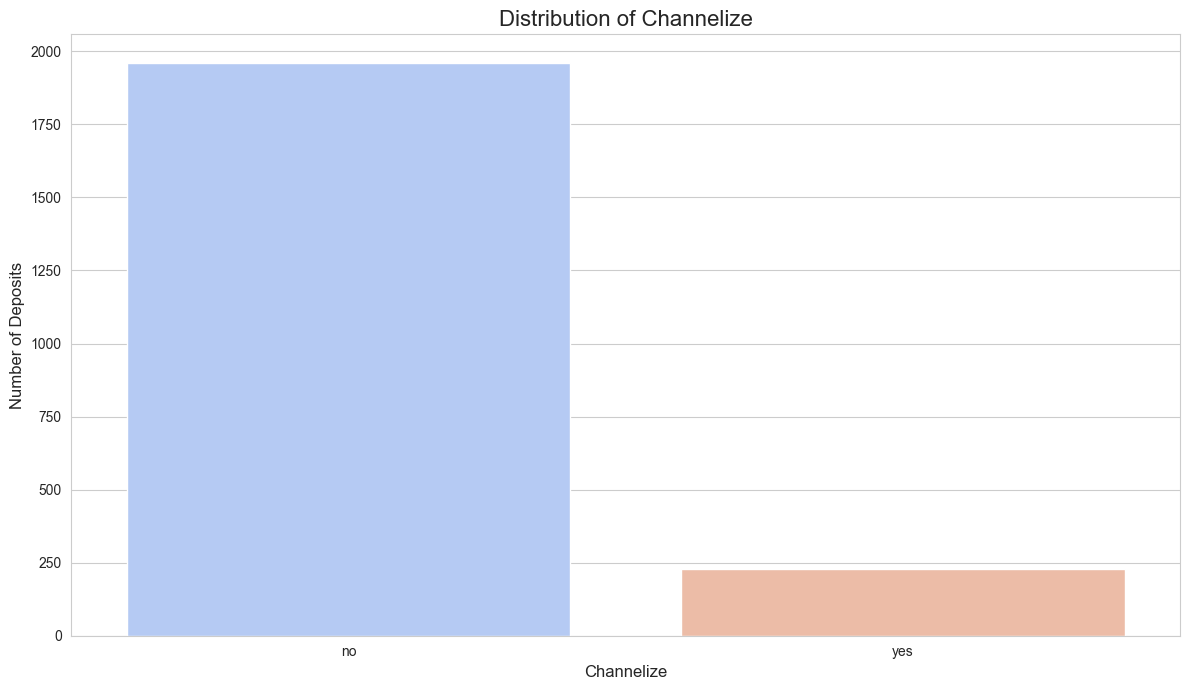

In [32]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

# Get the value counts
channelize_counts = gdf['Channelize'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=channelize_counts.index, y=channelize_counts.values, palette='coolwarm')

plt.title('Distribution of Channelize', fontsize=16)
plt.xlabel('Channelize', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Geometry

In [33]:
print("\nValue counts for 'geometry':")
print(gdf['geometry'].value_counts())


Value counts for 'geometry':
geometry
POLYGON ((362389.349 5872025.621, 362426.269 5...    1
POLYGON ((363580.984 5876860.547, 363536.599 5...    1
POLYGON ((331081.298 5880729.372, 331080.505 5...    1
POLYGON ((364597.66 5869944.358, 364596.676 58...    1
POLYGON ((366739.52 5867996.439, 366742.645 58...    1
                                                    ..
POLYGON ((364221.301 5867608.404, 364220.978 5...    1
POLYGON ((320117.484 5890958.043, 320077.6 589...    1
POLYGON ((344903.086 5875031.381, 344901.168 5...    1
POLYGON ((355315.425 5872649.865, 355314.357 5...    1
POLYGON ((319689.393 5890375.732, 319684.075 5...    1
Name: count, Length: 2188, dtype: int64


In [34]:
gdf['geometry_type'] = gdf['geometry'].geom_type
print("\nValue counts for 'Geometry':")
print(gdf['geometry_type'].value_counts())


Value counts for 'Geometry':
geometry_type
Polygon         2162
MultiPolygon      26
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_17058/2679377302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')


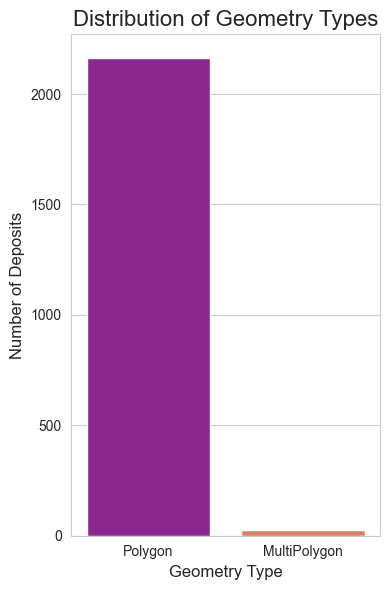

In [35]:
plt.figure(figsize=(4, 6))

geometry_counts = gdf['geometry_type'].value_counts()

# Create the bar plot
sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')

# Add titles and labels for clarity
plt.title('Distribution of Geometry Types', fontsize=16)
plt.xlabel('Geometry Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()